In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Sigmoid function
def sigmoid(x):
    
    sig = 1 / (1 + np.exp(-x))
    
    return(sig)

# Feed forward
def feed_forward(x, network):
    
    n_layers = network[4]+1 #number of hidden layers plus the output layer
    outputD = {}
    """
    print("============================FEEDFORWARD============================")
    print("=====================input {}=====================".format(x))
    print("Weights {}".format(network[0]))
    print("Bias {}".format(network[1]))
    print("Output {}".format(outputD))
    """
    for i in range(n_layers):
      
      if i==0: #if its the first layer
        #print('Capa {}'.format(i))
        dotproduct = np.matmul(x,network[0]['W_hl'+str(i)].transpose()) + network[1]['b_hl'+str(i)] #does dot product
        output = sigmoid(dotproduct) #
        #print(output)
        #print(output.shape)
        #print(output.transpose().shape)
        outputD['output_hl'+str(i)]=output #stores the output of each layer hidden layer
      elif i==n_layers-1: #if it is the last layer
        #print('Capa {}'.format(i))
        dotproduct = np.matmul(outputD['output_hl'+str(i-1)],network[0]['W_out'].transpose()) + network[1]['b_out'] #does dot product
        output = sigmoid(dotproduct) #
        #print(output)
        #print(output.shape)
        #print(output.transpose().shape)
        outputD['output_out']=output #stores the output of output layer
      else: #if its any other hidden layer
        #print('Capa {}'.format(i))
        dotproduct = np.matmul(outputD['output_hl'+str(i-1)],network[0]['W_hl'+str(i)].transpose()) + network[1]['b_hl'+str(i)] #does dot product
        output = sigmoid(dotproduct) #
        #print(output)
        #print(output.shape)
        #print(output.transpose().shape)
        outputD['output_hl'+str(i)]=output #stores the output of each layer hidden layer                       
      
      #print("Output {}".format(outputD))
    #print("============================FEEDFORWARD============================")
    
    return outputD

# Network error
def net_error(tar, out):
    
    #print("tar:{} out:{}".format(tar,out))
    err = 0.5 * np.power(tar - out, 2)
    
    return(err)

def outputLayer_Error(tar,network):
  
    #print("tar:{} net:{}".format(tar,network[2]['output_out']))
    #return -(tar - network[2]['output_out']) * network[2]['output_out'] * (1 - network[2]['output_out'])
    derivate = network[2]['output_out'] * (1-network[2]['output_out'])
    #print(derivate)
    diff = -(tar - network[2]['output_out'])
    #print(diff)
    return np.multiply(diff,derivate)
    
  
# Back-propagation
def BP(x, tar, network):
  
  
    """
    network[0]: weights
    network[1]: biases
    network[2]: outputs
    network[3]: error layer
    network[4]: n_hidden_layers


    """
    n_layers = network[4]+1 #number of hidden layers plus the output layer

    #Calculating errors of each layer
    for i in reversed(range(n_layers)):
      if i==n_layers-1: #if its the output layer
        # Output layer error (L)
        L_error = outputLayer_Error(tar,network)
        network[3]['e_output'] = L_error
      elif i==n_layers-2: #if its the last hidden layer before output layer
        if network[3]['e_output'].size!=1: #if its not only one neuron
          dotproduct = np.matmul(network[3]['e_output'],network[0]['W_out']) 
          l_error = dotproduct * network[2]['output_hl'+str(i)] * (1 - network[2]['output_hl'+str(i)])
          network[3]['e_hl'+str(i)] = l_error #stores the error of the i-hidden-layer  
        else:
          l_error = (network[3]['e_output'] * network[0]['W_out']) * (network[2]['output_hl'+str(i)] * (1 - network[2]['output_hl'+str(i)]))
          network[3]['e_hl'+str(i)] = l_error #stores the error of the i-hidden-layer  
      else:
        if network[3]['e_hl'+str(i+1)].size!=1:
          dotproduct = np.matmul(network[3]['e_hl'+str(i+1)],network[0]['W_hl'+str(i+1)]) 
          l_error = dotproduct * (network[2]['output_hl'+str(i)] * (1 - network[2]['output_hl'+str(i)]))
          network[3]['e_hl'+str(i)] = l_error #stores the error of the i-hidden-layer
        else:
          l_error = (network[3]['e_hl'+str(i+1)] * network[0]['W_hl'+str(i+1)]) * (network[2]['output_hl'+str(i)] * (1 - network[2]['output_hl'+str(i)]))
          network[3]['e_hl'+str(i)] = l_error #stores the error of the i-hidden-layer
              
    #print("Error {}".format(network[3]))
          
    #Calculating new weights and bias
    n_Weights = {}
    n_Bias = {}
    
    #print(network)
    for i in reversed(range(n_layers)):
      if i==n_layers-1:
        """
        print("Error layer {}".format(i))
        print("Error {}".format(network[3]['e_output']))
        print("previous output {}".format(network[2]['output_hl'+str(i-1)]))
        #n_W_out = network[0]['W_out'] - alpha * network[3]['e_output'] * network[2]['output_hl'+str(i-1)]
        #e_reshape = np.reshape(network[3]['e_output'],(network[3]['e_output'].size,1))
        #n_W_out = np.subtract(network[0]['W_out'] , (alpha * np.multiply(e_reshape , network[2]['output_hl'+str(i-1)])))
        """
        if network[3]['e_output'].size == 1: #if its only one gate to solve
            n_W_out = np.subtract(network[0]['W_out'] , (alpha * np.multiply(network[3]['e_output'] , network[2]['output_hl'+str(i-1)])))
            n_Weights['W_out'] = n_W_out
            n_b_out = network[1]['b_out'] - alpha * network[3]['e_output'] #calculates the new bias for the output layer
            n_Bias['b_out'] = n_b_out
        else:
            e_reshape = np.reshape(network[3]['e_output'],(network[3]['e_output'].size,1))
            n_W_out = np.subtract(network[0]['W_out'] , (alpha * np.multiply(e_reshape , network[2]['output_hl'+str(i-1)])))
            n_Weights['W_out'] = n_W_out
            n_b_out = network[1]['b_out'] - alpha * network[3]['e_output'] #calculates the new bias for the output layer
            n_Bias['b_out'] = n_b_out
                
      elif i!=0:
        """
        print("Error layer {}".format(i))
        print("Error {}".format(network[3]['e_hl'+str(i)]))
        print("previous output {}".format(network[2]['output_hl'+str(i-1)]))
        #n_W_hl = network[0]['W_hl'+str(i)] - (alpha * (network[3]['e_hl'+str(i)] * network[2]['output_hl'+str(i-1)])) #Actual weights - alpha *output_error *  activation_input_of_previous_hiddenLayer
        """
        e_reshape = np.reshape(network[3]['e_hl'+str(i)],(network[3]['e_hl'+str(i)].size,1))
        n_W_hl = np.subtract(network[0]['W_hl'+str(i)] , (alpha * np.multiply(e_reshape , network[2]['output_hl'+str(i-1)]))) #Actual weights - alpha *output_error *  activation_input_of_previous_hiddenLayer
        n_Weights['W_hl'+str(i)] = n_W_hl
        n_b_hl = network[1]['b_hl'+str(i)] - (alpha * network[3]['e_hl'+str(i)])
        n_Bias['b_hl'+str(i)] = n_b_hl                                     
      else:
        """
        print("Error layer {}".format(i))
        print("Error {}".format(network[3]['e_hl'+str(i)]))
        print("previous output {}".format(x))
        #n_W_hl = network[0]['W_hl'+str(i)] - (alpha * (network[3]['e_hl'+str(i)] * x)) #Actual weights - alpha *output_error * actual_input
        """
        e_reshape = np.reshape(network[3]['e_hl'+str(i)],(network[3]['e_hl'+str(i)].size,1))
        n_W_hl = np.subtract(network[0]['W_hl'+str(i)] , (alpha * np.multiply(e_reshape , x))) #Actual weights - alpha *output_error * actual_input
        n_Weights['W_hl'+str(i)] = n_W_hl   
        n_b_hl = network[1]['b_hl'+str(i)] - (alpha * network[3]['e_hl'+str(i)]) #Actual bias - alpha * output_error
        n_Bias['b_hl'+str(i)] = n_b_hl
    
    return(n_Weights,n_Bias)

# Testing patterns
def testing_patterns(X, network):
    
    print('       MLP result      ')
    print('Pat:          t:      out:')
    count = 0
    for x in X:
        output = feed_forward(x, network)
        print('{}. {} ---- {} ----> {}'.format(count, x, t[count],output['output_out']))
        count += 1
    
# Graph error
def graph_error(err_vector):

    plt.figure(0)
    plt.plot(err_vector)
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title('BP algorithm')
    plt.show()

# Decision boundaries
def dec_boundaries(X, t, network):
    
    # Creating mesh
    h = 0.01
    x_min, x_max = -0.2, 1.2
    y_min, y_max = -0.2, 1.2

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = np.c_[xx.ravel(), yy.ravel()]
    out = np.zeros(np.shape(Z)[0])
    
    # Output model
    for i in range(len(out)):
        outputD =  feed_forward(Z[i], network)
        out[i] = outputD['output_out']

    # out = (out >= 0.5).astype(int)
    out = out.reshape(xx.shape)
    levels = np.linspace(0, 1)
    plt.figure(1)
    plt.contourf(xx, yy, out, levels)
    plt.colorbar()

    # Plotting data
    lis = np.unique(t)
    for i in range(len(t)):
        if i == 0:
            pos = np.where(t == 0)[0]
            plt.plot(X[pos][:, 0], X[pos][:, 1], 'o', color = 'white', markersize = 15)

        else:
            pos = np.where(t == 1)[0]
            plt.plot(X[pos][:, 0], X[pos][:, 1], 'x', color = 'red', markersize = 15)

    plt.title('Decision boundary')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

#Defining architecture for the MLP    
def def_param(n_layers,X,t):
  weights = {}
  bias = {}
  n_neurons_layer = {}
  """
  initializing weights and bias as follows:
  np.random.normal(size=(param1,param2)), size takes two arguments where:
  
  param1 = no. neurons in the current layer
  param2 = no. neurons in the previous layer
  """
  for i in range(n_layers+1):
    
    if i==0:#if its the first layer
      n_neurons = int(input("Numero de neuronas en la capa {} ".format(i)))
      weights['W_hl'+str(i)] = np.random.normal(size=(n_neurons,X.shape[1]))#the no. of neurons in the previous layers is equal to the input vector length
      bias['b_hl'+str(i)] = np.random.normal(size=n_neurons)#the no. of bias is equal to the number of neurons
      n_neurons_layer['n_neurons'+str(i)] = n_neurons#stores the number of neurons in the current layer
    elif i==n_layers: #if its the output layer
      """
      the number of neurons in the output layer is equal to the target vector length
      """
      #weights['W_out'] = np.random.normal(size=(t.shape[1],n_neurons_layer['n_neurons'+str(i-1)]))
      #bias['b_out'] = np.random.normal(size=t.shape[1])
      if t.ndim == 1: #if its only one gate to solve
        weights['W_out'] = np.random.normal(size=(n_neurons_layer['n_neurons'+str(i-1)]))
        bias['b_out'] = np.random.normal(1)
        n_neurons_layer['n_neurons'+str(i)] =  1#stores the number of neurons in the current layer
      else:
        #t.shape[1] takes the number of columns of the target, this is the number of outputs in the output layer
        weights['W_out'] = np.random.normal(size=(t.shape[1],n_neurons_layer['n_neurons'+str(i-1)]))
        bias['b_out'] = np.random.normal(size=(t.shape[1]))
        n_neurons_layer['n_neurons'+str(i)] =  t.shape[1]#stores the number of neurons in the current layer
        
      
    else:#if its any other hidden layer
      n_neurons = int(input("Numero de neuronas en la capa {} ".format(i)))
      weights['W_hl'+str(i)] = np.random.normal(size=(n_neurons,n_neurons_layer['n_neurons'+str(i-1)]))
      bias['b_hl'+str(i)] = np.random.normal(size=n_neurons)
      n_neurons_layer['n_neurons'+str(i)] =  n_neurons#stores the number of neurons in the current layer
  
  #print(weights)
  #print(bias)
  return weights,bias      

def targets():
    print("¿Cuantas compuertas desea resolver?")
    print("[AND, OR, NAND, NOR, XOR]")
    op = int(input())
    if op == 1: #AND gate
        t = np.array([0, 0, 0, 1])
    elif op == 2: #AND, OR gate
        t = np.array([[0,0],[0,1],[0,1],[1,1]])
    elif op == 3: #AND, OR, NAND gate
        t = np.array([[0,0,1],[0,1,1],[0,1,1],[1,1,0]])
    elif op == 4: #AND, OR, NAND, NOR gate
        t = np.array([[0,0,1,1],[0,1,1,0],[0,1,1,0],[1,1,0,0]])
    elif op == 5: #AND, OR, NAND, NOR, XOR gate
        t = np.array([[0,0,1,1,0],[0,1,1,0,1],[0,1,1,0,1],[1,1,0,0,0]])
        
    print(t)
    return t
            
    
# Training patterns and targets
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

t = targets()

¿Cuantas compuertas desea resolver?
[AND, OR, NAND, NOR, XOR]
2
[[0 0]
 [0 1]
 [0 1]
 [1 1]]


In [12]:
#def_param(2,X,t)
#print(t)

[[0 0]
 [0 1]
 [0 1]
 [1 1]]


## **Modelo de la red neuronal**

In [28]:
#MODEL FOR MLP WITH N-HIDDEN-LAYERS WITH N-NEURONS IN EACH ONE
def Neural_network_model(X):
  
  n_hidden_layers = int(input('Número de capas ocultas: '))
  #n_nodes_hl1 = int(input('Número de neuronas en capa oculta: '))
  # Initial weights
  #using a normal(gaussian)distribution
  network = []
  
  layer_output = {}
  error_layer = {}
  weights,biases = def_param(n_hidden_layers,X,t)
  network.append(weights)
  network.append(biases)
  network.append(layer_output)
  network.append(error_layer)
  network.append(n_hidden_layers)
  
  
  return network


In [0]:
#MODEL FOR ONE HIDDEN LAYER WITH N-NEURONS

def Neural_network_model(X):
  
  n_hidden_layers = 1
  n_nodes_hl1 = int(input('Número de neuronas en capa oculta: '))
  # Initial weights
  #using a normal(gaussian)distribution
  network = []
  
  weights = {
      'W_hl0':np.random.normal(size=(n_nodes_hl1,X.shape[1])),
      'W_out':np.random.normal(size=(n_nodes_hl1))
  }
  
  
  
  biases = {
      'b_hl0':np.random.normal(size=(n_nodes_hl1)),
      'b_out':np.random.normal(size=(1))
  }
  
  
  layer_output = {}
  error_layer = {}
  
  network.append(weights)
  network.append(biases)
  network.append(layer_output)
  network.append(error_layer)
  network.append(n_hidden_layers)
  
  
  return network

In [29]:

network = Neural_network_model(X)
print(network)


Número de capas ocultas: 5
Numero de neuronas en la capa 0 2
Numero de neuronas en la capa 1 3
Numero de neuronas en la capa 2 4
Numero de neuronas en la capa 3 5
Numero de neuronas en la capa 4 6
[{'W_hl0': array([[-1.8202256 ,  0.1507303 ],
       [-0.28734299,  0.65974343]]), 'W_hl1': array([[ 0.00695177,  0.13727039],
       [-0.9353746 , -0.61674792],
       [-0.79592954, -0.83122371]]), 'W_hl2': array([[-0.68704338,  1.35129118, -0.45276443],
       [-0.90002485, -0.09057316,  0.06720032],
       [-1.15293032,  0.3004962 , -0.47343666],
       [ 0.79698928, -0.0701605 , -0.41785284]]), 'W_hl3': array([[ 1.1602885 , -0.87085663, -0.16752578, -0.70955798],
       [ 0.62957715,  0.79333201,  1.05340093,  0.84219251],
       [-0.72856723, -0.33798915,  0.67528207, -0.93242156],
       [ 0.83185819, -2.01459993, -1.81432   ,  0.58863118],
       [ 0.35035374,  0.94003683, -1.79605938,  1.29856582]]), 'W_hl4': array([[ 0.14814962,  0.14320521,  0.20362358,  0.04295388,  0.70530405],
  

## **Entrenando la red neuronal**

Epoch 0 error [0.00071724 0.00081965]
Epoch 1 error [0.00071682 0.00081918]
Epoch 2 error [0.0007164  0.00081871]
Epoch 3 error [0.00071598 0.00081824]
Epoch 4 error [0.00071556 0.00081777]
Epoch 5 error [0.00071514 0.00081731]
Epoch 6 error [0.00071472 0.00081684]
Epoch 7 error [0.0007143  0.00081637]
Epoch 8 error [0.00071388 0.0008159 ]
Epoch 9 error [0.00071346 0.00081544]
Epoch 10 error [0.00071305 0.00081497]
Epoch 11 error [0.00071263 0.00081451]
Epoch 12 error [0.00071221 0.00081404]
Epoch 13 error [0.00071179 0.00081358]
Epoch 14 error [0.00071138 0.00081311]
Epoch 15 error [0.00071096 0.00081265]
Epoch 16 error [0.00071055 0.00081219]
Epoch 17 error [0.00071013 0.00081173]
Epoch 18 error [0.00070972 0.00081126]
Epoch 19 error [0.00070931 0.0008108 ]
Epoch 20 error [0.00070889 0.00081034]
Epoch 21 error [0.00070848 0.00080988]
Epoch 22 error [0.00070807 0.00080942]
Epoch 23 error [0.00070766 0.00080896]
Epoch 24 error [0.00070724 0.00080851]
Epoch 25 error [0.00070683 0.000808

Epoch 224 error [0.0006332 0.0007259]
Epoch 225 error [0.00063287 0.00072553]
Epoch 226 error [0.00063254 0.00072516]
Epoch 227 error [0.0006322  0.00072479]
Epoch 228 error [0.00063187 0.00072442]
Epoch 229 error [0.00063154 0.00072405]
Epoch 230 error [0.00063121 0.00072368]
Epoch 231 error [0.00063088 0.00072331]
Epoch 232 error [0.00063055 0.00072294]
Epoch 233 error [0.00063022 0.00072257]
Epoch 234 error [0.00062989 0.0007222 ]
Epoch 235 error [0.00062956 0.00072183]
Epoch 236 error [0.00062923 0.00072146]
Epoch 237 error [0.0006289 0.0007211]
Epoch 238 error [0.00062857 0.00072073]
Epoch 239 error [0.00062824 0.00072036]
Epoch 240 error [0.00062791 0.00072   ]
Epoch 241 error [0.00062758 0.00071963]
Epoch 242 error [0.00062726 0.00071926]
Epoch 243 error [0.00062693 0.0007189 ]
Epoch 244 error [0.0006266  0.00071853]
Epoch 245 error [0.00062628 0.00071817]
Epoch 246 error [0.00062595 0.00071781]
Epoch 247 error [0.00062562 0.00071744]
Epoch 248 error [0.0006253  0.00071708]
Epoc

Epoch 466 error [0.00056128 0.00064554]
Epoch 467 error [0.00056101 0.00064525]
Epoch 468 error [0.00056075 0.00064495]
Epoch 469 error [0.00056048 0.00064465]
Epoch 470 error [0.00056022 0.00064436]
Epoch 471 error [0.00055995 0.00064406]
Epoch 472 error [0.00055969 0.00064377]
Epoch 473 error [0.00055943 0.00064347]
Epoch 474 error [0.00055916 0.00064318]
Epoch 475 error [0.0005589  0.00064289]
Epoch 476 error [0.00055864 0.00064259]
Epoch 477 error [0.00055838 0.0006423 ]
Epoch 478 error [0.00055811 0.00064201]
Epoch 479 error [0.00055785 0.00064171]
Epoch 480 error [0.00055759 0.00064142]
Epoch 481 error [0.00055733 0.00064113]
Epoch 482 error [0.00055707 0.00064083]
Epoch 483 error [0.00055681 0.00064054]
Epoch 484 error [0.00055654 0.00064025]
Epoch 485 error [0.00055628 0.00063996]
Epoch 486 error [0.00055602 0.00063967]
Epoch 487 error [0.00055576 0.00063938]
Epoch 488 error [0.0005555  0.00063909]
Epoch 489 error [0.00055524 0.0006388 ]
Epoch 490 error [0.00055498 0.00063851]


Epoch 748 error [0.00049497 0.00057134]
Epoch 749 error [0.00049477 0.0005711 ]
Epoch 750 error [0.00049456 0.00057087]
Epoch 751 error [0.00049435 0.00057064]
Epoch 752 error [0.00049414 0.0005704 ]
Epoch 753 error [0.00049393 0.00057017]
Epoch 754 error [0.00049373 0.00056994]
Epoch 755 error [0.00049352 0.0005697 ]
Epoch 756 error [0.00049331 0.00056947]
Epoch 757 error [0.0004931  0.00056924]
Epoch 758 error [0.0004929  0.00056901]
Epoch 759 error [0.00049269 0.00056878]
Epoch 760 error [0.00049248 0.00056855]
Epoch 761 error [0.00049228 0.00056831]
Epoch 762 error [0.00049207 0.00056808]
Epoch 763 error [0.00049186 0.00056785]
Epoch 764 error [0.00049166 0.00056762]
Epoch 765 error [0.00049145 0.00056739]
Epoch 766 error [0.00049125 0.00056716]
Epoch 767 error [0.00049104 0.00056693]
Epoch 768 error [0.00049084 0.0005667 ]
Epoch 769 error [0.00049063 0.00056647]
Epoch 770 error [0.00049043 0.00056624]
Epoch 771 error [0.00049022 0.00056601]
Epoch 772 error [0.00049002 0.00056578]


Epoch 1028 error [0.00044249 0.00051249]
Epoch 1029 error [0.00044233 0.0005123 ]
Epoch 1030 error [0.00044216 0.00051211]
Epoch 1031 error [0.00044199 0.00051192]
Epoch 1032 error [0.00044182 0.00051174]
Epoch 1033 error [0.00044165 0.00051155]
Epoch 1034 error [0.00044149 0.00051136]
Epoch 1035 error [0.00044132 0.00051117]
Epoch 1036 error [0.00044115 0.00051098]
Epoch 1037 error [0.00044098 0.00051079]
Epoch 1038 error [0.00044082 0.00051061]
Epoch 1039 error [0.00044065 0.00051042]
Epoch 1040 error [0.00044048 0.00051023]
Epoch 1041 error [0.00044032 0.00051004]
Epoch 1042 error [0.00044015 0.00050986]
Epoch 1043 error [0.00043998 0.00050967]
Epoch 1044 error [0.00043982 0.00050948]
Epoch 1045 error [0.00043965 0.0005093 ]
Epoch 1046 error [0.00043948 0.00050911]
Epoch 1047 error [0.00043932 0.00050892]
Epoch 1048 error [0.00043915 0.00050874]
Epoch 1049 error [0.00043899 0.00050855]
Epoch 1050 error [0.00043882 0.00050836]
Epoch 1051 error [0.00043865 0.00050818]
Epoch 1052 error

Epoch 1253 error [0.00040747 0.00047315]
Epoch 1254 error [0.00040733 0.00047299]
Epoch 1255 error [0.00040718 0.00047283]
Epoch 1256 error [0.00040704 0.00047267]
Epoch 1257 error [0.0004069  0.00047251]
Epoch 1258 error [0.00040675 0.00047235]
Epoch 1259 error [0.00040661 0.00047218]
Epoch 1260 error [0.00040647 0.00047202]
Epoch 1261 error [0.00040632 0.00047186]
Epoch 1262 error [0.00040618 0.0004717 ]
Epoch 1263 error [0.00040604 0.00047154]
Epoch 1264 error [0.0004059  0.00047138]
Epoch 1265 error [0.00040575 0.00047122]
Epoch 1266 error [0.00040561 0.00047106]
Epoch 1267 error [0.00040547 0.0004709 ]
Epoch 1268 error [0.00040532 0.00047074]
Epoch 1269 error [0.00040518 0.00047058]
Epoch 1270 error [0.00040504 0.00047042]
Epoch 1271 error [0.0004049  0.00047026]
Epoch 1272 error [0.00040476 0.0004701 ]
Epoch 1273 error [0.00040461 0.00046994]
Epoch 1274 error [0.00040447 0.00046978]
Epoch 1275 error [0.00040433 0.00046962]
Epoch 1276 error [0.00040419 0.00046946]
Epoch 1277 error

Epoch 1551 error [0.00036852 0.00042934]
Epoch 1552 error [0.00036841 0.0004292 ]
Epoch 1553 error [0.00036829 0.00042907]
Epoch 1554 error [0.00036817 0.00042893]
Epoch 1555 error [0.00036805 0.0004288 ]
Epoch 1556 error [0.00036793 0.00042867]
Epoch 1557 error [0.00036781 0.00042853]
Epoch 1558 error [0.0003677 0.0004284]
Epoch 1559 error [0.00036758 0.00042827]
Epoch 1560 error [0.00036746 0.00042814]
Epoch 1561 error [0.00036734 0.000428  ]
Epoch 1562 error [0.00036722 0.00042787]
Epoch 1563 error [0.0003671  0.00042774]
Epoch 1564 error [0.00036699 0.0004276 ]
Epoch 1565 error [0.00036687 0.00042747]
Epoch 1566 error [0.00036675 0.00042734]
Epoch 1567 error [0.00036663 0.00042721]
Epoch 1568 error [0.00036652 0.00042707]
Epoch 1569 error [0.0003664  0.00042694]
Epoch 1570 error [0.00036628 0.00042681]
Epoch 1571 error [0.00036616 0.00042668]
Epoch 1572 error [0.00036605 0.00042655]
Epoch 1573 error [0.00036593 0.00042641]
Epoch 1574 error [0.00036581 0.00042628]
Epoch 1575 error [

Epoch 1855 error [0.00033553 0.00039214]
Epoch 1856 error [0.00033543 0.00039203]
Epoch 1857 error [0.00033533 0.00039192]
Epoch 1858 error [0.00033523 0.00039181]
Epoch 1859 error [0.00033513 0.0003917 ]
Epoch 1860 error [0.00033504 0.00039159]
Epoch 1861 error [0.00033494 0.00039147]
Epoch 1862 error [0.00033484 0.00039136]
Epoch 1863 error [0.00033474 0.00039125]
Epoch 1864 error [0.00033464 0.00039114]
Epoch 1865 error [0.00033454 0.00039103]
Epoch 1866 error [0.00033444 0.00039092]
Epoch 1867 error [0.00033434 0.00039081]
Epoch 1868 error [0.00033425 0.00039069]
Epoch 1869 error [0.00033415 0.00039058]
Epoch 1870 error [0.00033405 0.00039047]
Epoch 1871 error [0.00033395 0.00039036]
Epoch 1872 error [0.00033385 0.00039025]
Epoch 1873 error [0.00033375 0.00039014]
Epoch 1874 error [0.00033366 0.00039003]
Epoch 1875 error [0.00033356 0.00038992]
Epoch 1876 error [0.00033346 0.00038981]
Epoch 1877 error [0.00033336 0.0003897 ]
Epoch 1878 error [0.00033326 0.00038959]
Epoch 1879 error

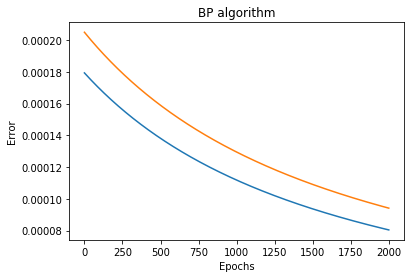

In [32]:
err_vector = []
alpha = 0.7
epochs = 2000

for epoch in range(epochs):

    count = 0
    err = 0

    for x in X:

        # Feed forward
        network[2] = feed_forward(x, network)

        # Network error
        err += net_error(t[count], network[2]['output_out'])

        # Back propagation
        network[0],network[1] = BP(x, t[count], network)

        count += 1
    print("Epoch {} error {}".format(epoch,err))    
    err_vector.append(err / X.shape[0])

# Testing patterns
testing_patterns(X, network)

# Graph error
graph_error(err_vector)

# Decision boundaries
#dec_boundaries(X, t,  network)

